In [13]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import math
import seaborn as sns
import numpy as np
from scipy import stats
import scipy

# BOX-COX TX

Lambda value used for box-cox tx: 0.2734681505805533


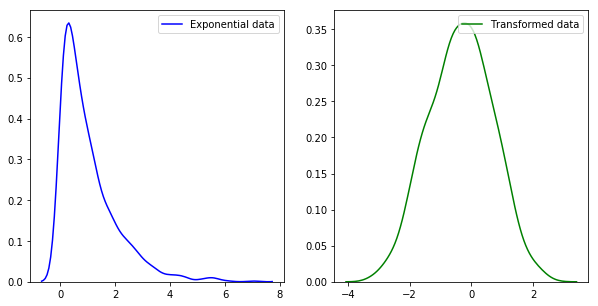

In [11]:
# To show this, we'll generate some random data that follows a power law
exp_data = np.random.exponential(size=1000) 

# perform the transformation 
tx_data, _lambda = stats.boxcox(exp_data) # note, lambda is a reserved word

# creating axes to draw plots 
fig, ax = plt.subplots(1, 2) 

# plotting original and transformed data
sns.distplot(
    exp_data, 
    hist=False, 
    kde=True, 
    label="Exponential data", 
    color="blue", 
    ax=ax[0]
) 

sns.distplot(
    tx_data, 
    hist=False, 
    kde=True, 
    label="Transformed data", 
    color="green", 
    ax=ax[1]
) 

plt.legend(loc="upper right") 

fig.set_figheight(5) 
fig.set_figwidth(10) 

print("Lambda value used for box-cox tx: {0}".format(_lambda)) 

# LOG-NORMAL

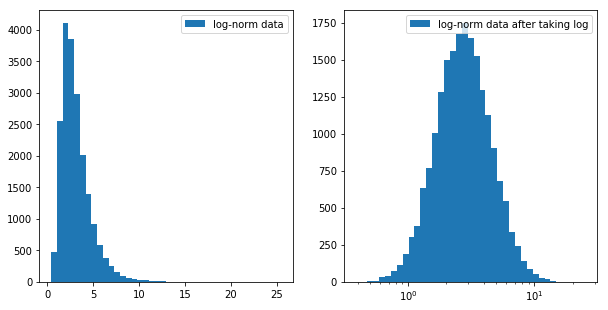

In [55]:
# generate log-normal distributed set of samples
np.random.seed(42) # so that it is reproducible
log_norm_data = np.random.lognormal(mean=1,sigma=.5, size=20000)
log_min = log_norm_data.min()
log_max = log_norm_data.max()

# plot a histrogram with linear x-axis
fig, ax = plt.subplots(1, 2)          
fig.set_figheight(5) 
fig.set_figwidth(10) 
bins = 40
counts, bin_edges, ignored = ax[0].hist(log_norm_data, bins=bins, label='log-norm data')

plt.xscale( 'log' )

ax[0].legend()

# make a histrogram with a log10 x-axis
# equally sized bins (in log10-scale)
bins_log10 = np.logspace(np.log10(log_min), np.log10(log_max), bins )
counts, bin_edges, ignored = ax[1].hist(log_norm_data, bins_log10, histtype='stepfilled', label='log-norm data after taking log')
ax[1].legend()

plt.show()

# STANDARDISATION & NORMALISATION

In [105]:
# STANDARDISATION
from sklearn import preprocessing
import numpy as np# Get dataset
cols_to_use = ['total_bedrooms', 'median_income']
df = pd.read_csv("cali_housing/housing.csv")[cols_to_use]  #  Normalize total_bedrooms column

df.dropna(inplace=True)
df['total_bedroom_norm'] = preprocessing.normalize([np.array(df.total_bedrooms)])[0]
df['median_income_norm'] = preprocessing.normalize([np.array(df.median_income)])[0]
print(df.max(), df.min())


scaler = preprocessing.StandardScaler()# Fit your data on the scaler object
scaled_df = scaler.fit_transform(df[cols_to_use])
scaled_df = pd.DataFrame(scaled_df, columns=cols_to_use)
print(scaled_df.mean(), scaled_df.std())

total_bedrooms        6445.000000
median_income           15.000100
total_bedroom_norm       0.065988
median_income_norm       0.024336
dtype: float64 total_bedrooms        1.000000
median_income         0.499900
total_bedroom_norm    0.000010
median_income_norm    0.000811
dtype: float64
total_bedrooms    2.035816e-16
median_income     3.832505e-16
dtype: float64 total_bedrooms    1.000024
median_income     1.000024
dtype: float64


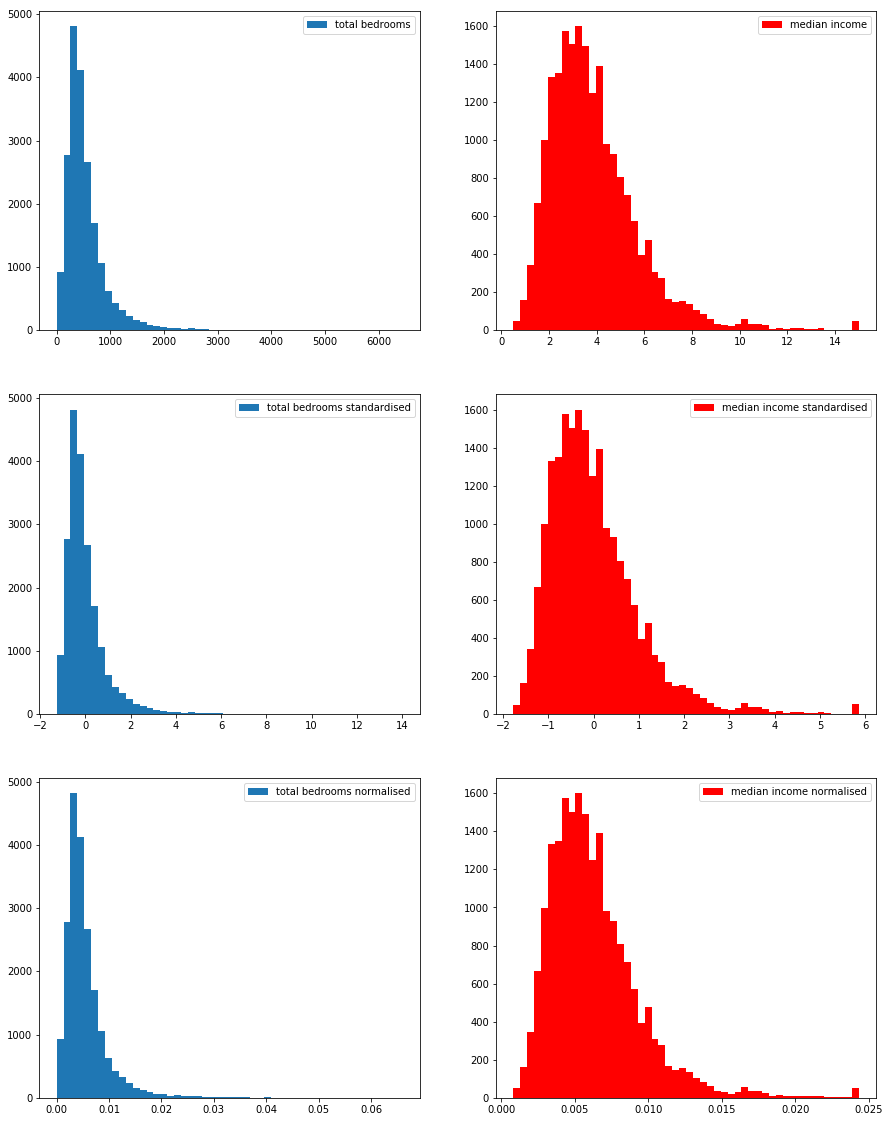

In [106]:
fig, ax = plt.subplots(3, 2)
fig.set_size_inches(15, 20)
ax[0,0].hist(df.total_bedrooms, bins=50, label='total bedrooms')
ax[0,0].legend()

ax[0,1].hist(df.median_income, bins=50, color='red', label='median income')
ax[0,1].legend()

ax[2,0].hist(df.total_bedroom_norm, bins=50, label='total bedrooms normalised')
ax[2,0].legend()

ax[2,1].hist(df.median_income_norm, bins=50, color='red', label='median income normalised')
ax[2,1].legend()

ax[1,0].hist(scaled_df.total_bedrooms, bins=50, label='total bedrooms standardised')
ax[1,0].legend()

ax[1,1].hist(scaled_df.median_income, bins=50, color='red', label='median income standardised')
ax[1,1].legend()
plt.legend()

# OUTLIERS USING PYOD
SEE https://www.analyticsvidhya.com/blog/2019/02/outlier-detection-python-pyod/

Text(0, 0.5, 'F2')

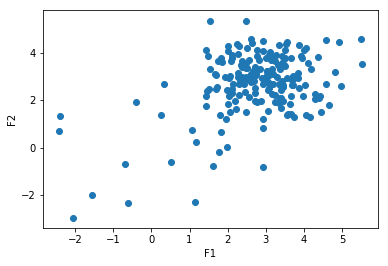

In [59]:
!pip install pyod
from pyod.models.abod import ABOD
from pyod.models.knn import KNN
from pyod.utils.data import generate_data, get_outliers_inliers
import matplotlib.font_manager

#generate random data with two features
X_train, Y_train = generate_data(n_train=200,train_only=True, n_features=2)

# by default the outlier fraction is 0.1 in generate data function 
outlier_fraction = 0.1

# store outliers and inliers in different numpy arrays
x_outliers, x_inliers = get_outliers_inliers(X_train,Y_train)

n_inliers = len(x_inliers)
n_outliers = len(x_outliers)

#separate the two features and use it to plot the data 
F1 = X_train[:,[0]].reshape(-1,1)
F2 = X_train[:,[1]].reshape(-1,1)

# create a meshgrid 
xx , yy = np.meshgrid(np.linspace(-10, 10, 200), np.linspace(-10, 10, 200))

# scatter plot 
plt.scatter(F1,F2)
plt.xlabel('F1')
plt.ylabel('F2') 


No of Errors :  Angle-based Outlier Detector (ABOD) 10


C:\Users\kungr\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


No of Errors :  K Nearest Neighbors (KNN) 9


C:\Users\kungr\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


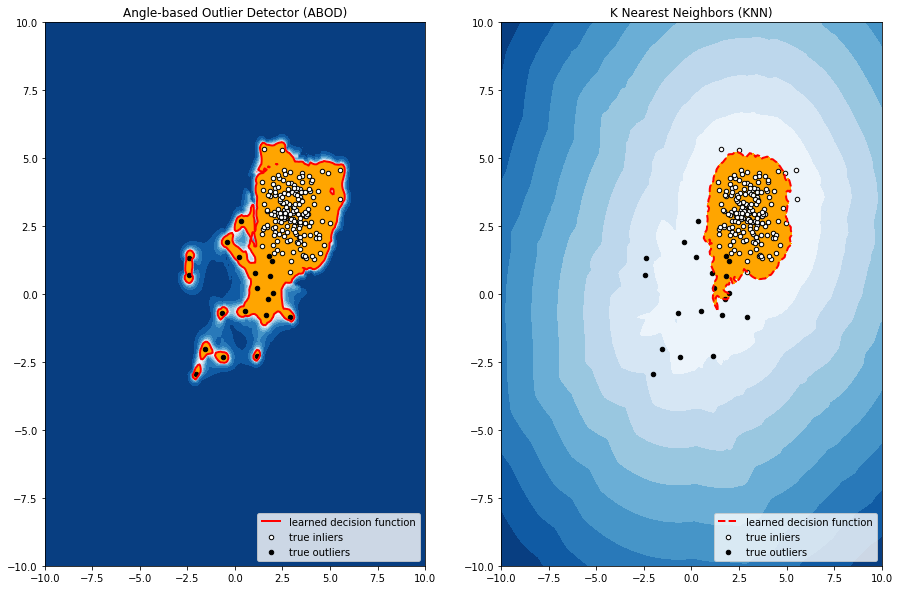

In [62]:
classifiers = {
     'Angle-based Outlier Detector (ABOD)'   : ABOD(contamination=outlier_fraction),
     'K Nearest Neighbors (KNN)' :  KNN(contamination=outlier_fraction)
}

# set the figure size
plt.figure(figsize=(15, 10))

for i, (clf_name,clf) in enumerate(classifiers.items()) :
    # fit the dataset to the model
    clf.fit(X_train)

    # predict raw anomaly score
    scores_pred = clf.decision_function(X_train)*-1

    # prediction of a datapoint category outlier or inlier
    y_pred = clf.predict(X_train)

    # no of errors in prediction
    n_errors = (y_pred != Y_train).sum()
    print('No of Errors : ',clf_name, n_errors)

    # rest of the code is to create the visualization

    # threshold value to consider a datapoint inlier or outlier
    threshold = stats.scoreatpercentile(scores_pred,100 *outlier_fraction)

    # decision function calculates the raw anomaly score for every point
    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()]) * -1
    Z = Z.reshape(xx.shape)

    subplot = plt.subplot(1, 2, i + 1)

    # fill blue colormap from minimum anomaly score to threshold value
    subplot.contourf(xx, yy, Z, levels = np.linspace(Z.min(), threshold, 10),cmap=plt.cm.Blues_r)

    # draw red contour line where anomaly score is equal to threshold
    a = subplot.contour(xx, yy, Z, levels=[threshold],linewidths=2, colors='red')

    # fill orange contour lines where range of anomaly score is from threshold to maximum anomaly score
    subplot.contourf(xx, yy, Z, levels=[threshold, Z.max()],colors='orange')

    # scatter plot of inliers with white dots
    b = subplot.scatter(X_train[:-n_outliers, 0], X_train[:-n_outliers, 1], c='white',s=20, edgecolor='k') 
    # scatter plot of outliers with black dots
    c = subplot.scatter(X_train[-n_outliers:, 0], X_train[-n_outliers:, 1], c='black',s=20, edgecolor='k')
    subplot.axis('tight')

    subplot.legend(
        [a.collections[0], b, c],
        ['learned decision function', 'true inliers', 'true outliers'],
        prop=matplotlib.font_manager.FontProperties(size=10),
        loc='lower right')

    subplot.set_title(clf_name)
    subplot.set_xlim((-10, 10))
    subplot.set_ylim((-10, 10))
plt.show() 

# IDENTIFYING DUPLICATES WITH GROUPBY

In [66]:
# let's load the data twice into a single dataframe
df_titanic = pd.concat((pd.read_csv('titanic/train.csv'), pd.read_csv('titanic/train.csv')))

In [69]:
# here we group by ticket and name and count, and we can see it has doubled - duplicates!
df_titanic.groupby(['Ticket', 'Name']).count()

PassengerId  \
Ticket      Name                                                              
110152      Cherry, Miss. Gladys                                          2   
            Maioni, Miss. Roberta                                         2   
            Rothes, the Countess. of (Lucy Noel Martha Dyer...            2   
110413      Taussig, Miss. Ruth                                           2   
            Taussig, Mr. Emil                                             2   
...                                                                     ...   
W./C. 6609  Harknett, Miss. Alice Phoebe                                  2   
W.E.P. 5734 Chaffee, Mr. Herbert Fuller                                   2   
W/C 14208   Harris, Mr. Walter                                            2   
WE/P 5735   Crosby, Capt. Edward Gifford                                  2   
            Crosby, Miss. Harriet R                                       2   

                                                                Survived  \
Ticket      Name                                                           
110152      Cherry, Miss. Gladys                                       2   
            Maioni, Miss. Roberta                                      2   
            Rothes, the Countess. of (Lucy Noel Martha Dyer...         2   
110413      Taussig, Miss. Ruth                                        2   
            Taussig, Mr. Emil                                          2   
...                                                                  ...   
W./C. 6609  Harknett, Miss. Alice Phoebe                               2   
W.E.P. 5734 Chaffee, Mr. Herbert Fuller                                2   
W/C 14208   Harris, Mr. Walter                                         2   
WE/P 5735   Crosby, Capt. Edward Gifford                               2   
            Crosby, Miss. Harriet R                                    2   

                                                                Pclass  Sex  \
Ticket      Name                                                              
110152      Cherry, Miss. Gladys                                     2    2   
            Maioni, Miss. Roberta                                    2    2   
            Rothes, the Countess. of (Lucy Noel Martha Dyer...       2    2   
110413      Taussig, Miss. Ruth                                      2    2   
            Taussig, Mr. Emil                                        2    2   
...                                                                ...  ...   
W./C. 6609  Harknett, Miss. Alice Phoebe                             2    2   
W.E.P. 5734 Chaffee, Mr. Herbert Fuller                              2    2   
W/C 14208   Harris, Mr. Walter                                       2    2   
WE/P 5735   Crosby, Capt. Edward Gifford                             2    2   
            Crosby, Miss. Harriet R                                  2    2   

                                                                Age  SibSp  \
Ticket      Name                                                             
110152      Cherry, Miss. Gladys                                  2      2   
            Maioni, Miss. Roberta                                 2      2   
            Rothes, the Countess. of (Lucy Noel Martha Dyer...    2      2   
110413      Taussig, Miss. Ruth                                   2      2   
            Taussig, Mr. Emil                                     2      2   
...                                                             ...    ...   
W./C. 6609  Harknett, Miss. Alice Phoebe                          0      2   
W.E.P. 5734 Chaffee, Mr. Herbert Fuller                           2      2   
W/C 14208   Harris, Mr. Walter                                    2      2   
WE/P 5735   Crosby, Capt. Edward Gifford                          2      2   
            Crosby, Miss. Harriet R                               2      2   

    

In [71]:
df_titanic.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
886     True
887     True
888     True
889     True
890     True
Length: 1782, dtype: bool